<a href="https://colab.research.google.com/github/doctorf72/Naya_ML_RegressionProject/blob/main/Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/chaunguynnghunh/sepsis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as split
import warnings
from sys import modules
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df_train = pd.read_csv('Paitients_Files_Train.csv')
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [4]:
df_train.shape

(599, 11)

In [5]:
df_train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df_train.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [7]:
df_train.nunique()

ID           599
PRG           17
PL           129
PR            44
SK            51
TS           164
M11          233
BD2          437
Age           50
Insurance      2
Sepssis        2
dtype: int64

Text(0.5, 1.0, 'Data Distribution')

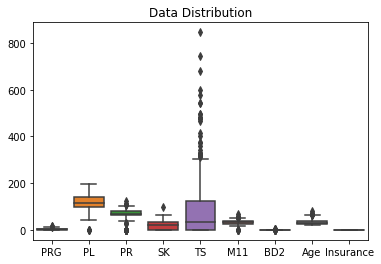

In [8]:
sns.boxplot(data=df_train).set_title('Data Distribution')

Text(0.5, 1.0, 'Data Distribution')

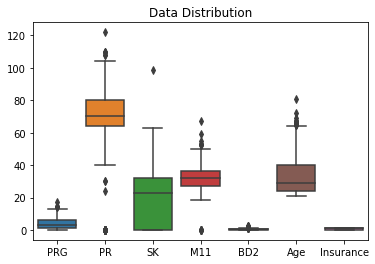

In [9]:
sns.boxplot(data=df_train.drop(['TS','PL'], axis = 1)).set_title('Data Distribution')

Text(0.5, 1.0, 'TS Data Distribution')

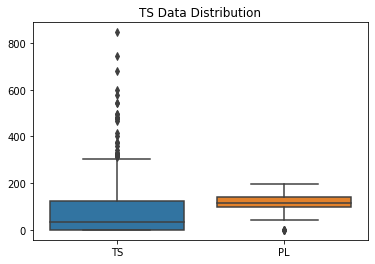

In [10]:
sns.boxplot(data=df_train[['TS','PL']]).set_title('TS Data Distribution')

Text(0.5, 1.0, 'TS and PL features distribution')

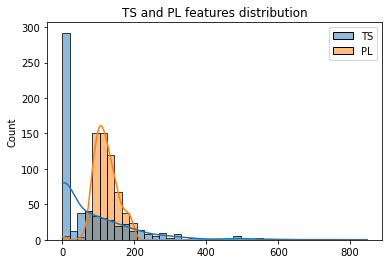

In [11]:
sns.histplot(data=df_train[['TS', 'PL']], kde = True ).set_title("TS and PL features distribution")

### **Removing 6 sigma outliers from TS feature**

In [12]:
# ave = df_train['TS'].mean()
# std = df_train['TS'].std()
# df_train = df_train.loc[df_train['TS'].between(ave-3*std, ave+3*std)]
# sns.boxplot(data=df_train['TS']).set_title('TS Data Distribution')

In [13]:
df_train.shape

(599, 11)

Can we improve model by removing outliers from train dataset?

---



[link text](https://github.com/doctorf72/Naya_ML_RegressionProject/commit/fe961f942a0d992a593533905e0925e4b0fd2d0c)

Text(0.5, 1.0, 'PRG Histogramm')

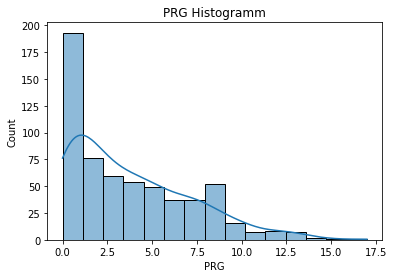

In [14]:
sns.histplot(data=df_train['PRG'], kde = True ).set_title('PRG Histogramm')

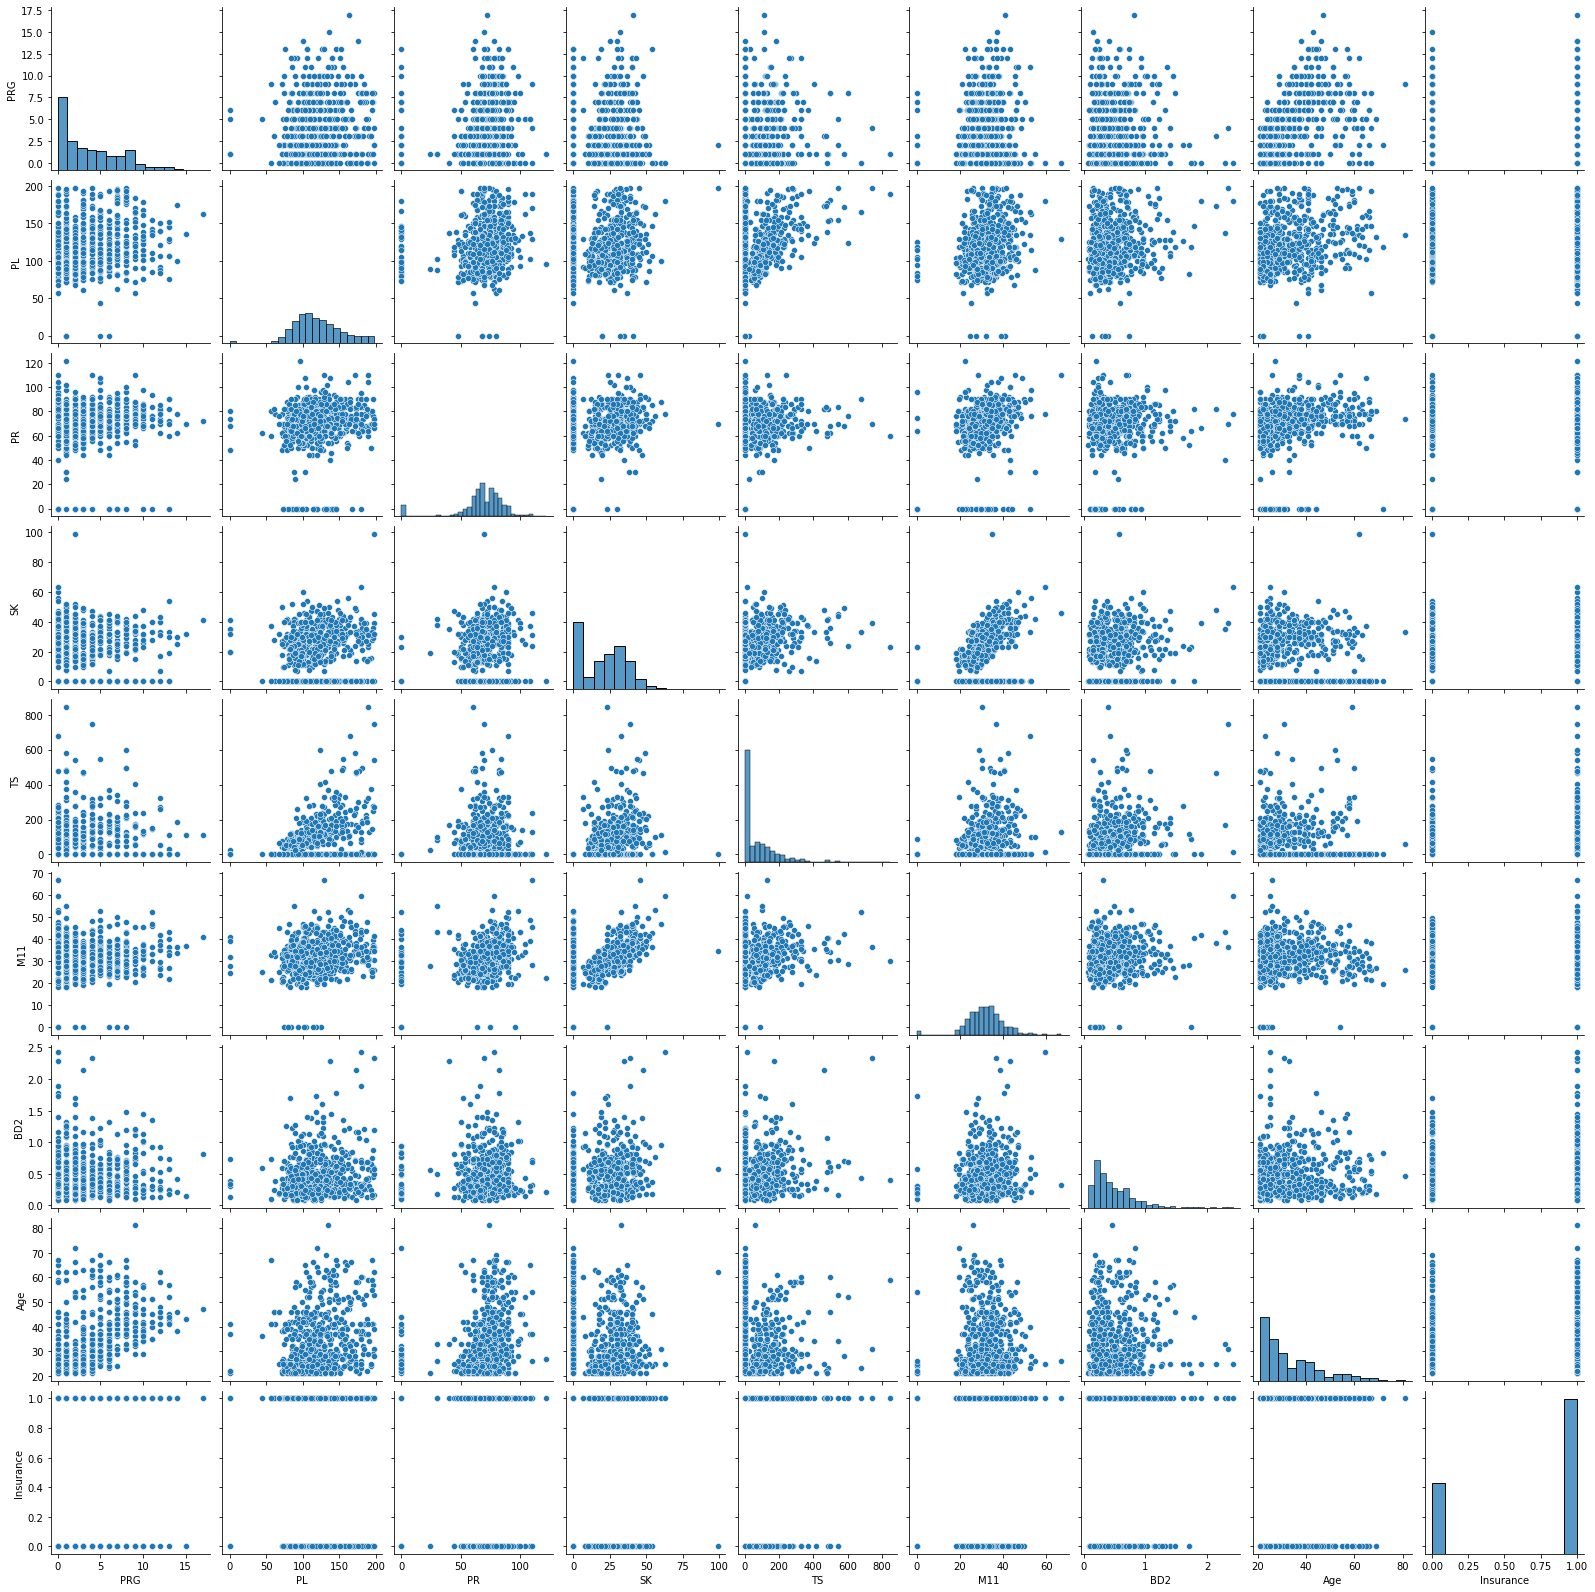

In [15]:
sns.pairplot(df_train)

<Axes: >

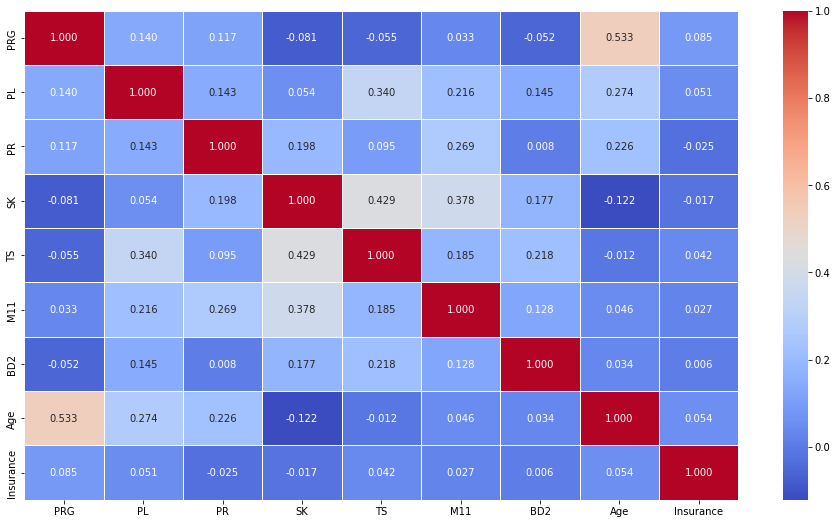

In [16]:
plt.figure(figsize = (16,9))
sns.heatmap(df_train.corr(), cmap="coolwarm", annot=True, fmt=".3f", linewidth=.5)

In [17]:
df_train.corr().loc['PRG'].abs().sort_values(ascending = False)

PRG          1.000000
Age          0.532545
PL           0.139541
PR           0.116680
Insurance    0.084631
SK           0.080902
TS           0.054812
BD2          0.052230
M11          0.033482
Name: PRG, dtype: float64

In [18]:
X_train = df_train[['Age']]
y_train = df_train['PRG']

**Model Inspection**

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
print("The model intercept is: {}".format(model.intercept_))
print("The model coefficients are: {}".format(model.coef_[0]))

The model intercept is: -1.215570142279216
The model coefficients are: 0.15140296450655685


Predicting with the model

In [21]:
y_train_pred = model.predict(X_train)

In [22]:
pd.DataFrame({'y_train': y_train, 'y_train_pred': y_train_pred}).head()

,y_train,y_train_pred
0,6,6.354578
1,1,3.477922
2,8,3.629325
3,1,1.963892
4,0,3.780728


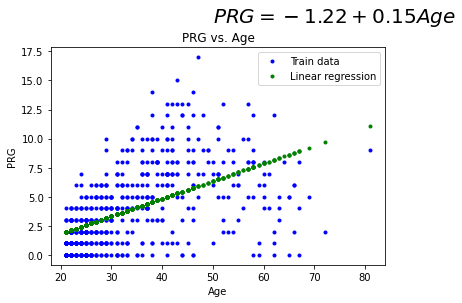

In [25]:
plt.figure()
plt.plot(X_train.Age, y_train, '.b')
plt.plot(X_train.Age, y_train_pred, 
         linewidth=3, color='g', ls='', marker='.')
plt.xlabel('Age')
plt.ylabel('PRG')
plt.title('PRG vs. Age')
plt.legend(['Train data', 'Linear regression'], loc='best')
plt.text(50, 20, '$PRG={:.2f}+{:.2f}Age$'\
         .format(model.intercept_, model.coef_[0]), fontsize=20);

In [26]:
age_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE = {age_rmse:.2f}")

RMSE = 2.84


**Assess the model**

In [27]:
df_test = pd.read_csv('Paitients_Files_Test.csv')
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [28]:
df_test['PRG prediction'] = model.predict(df_test[['Age']])
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,PRG prediction
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,2.720907
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,2.418101
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,3.023713
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,3.326519
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,6.960190


In [29]:
age_test_rmse = np.sqrt(mean_squared_error(df_test['PRG'], df_test['PRG prediction']))
print("RMSE = {:.2f}".format(age_test_rmse))

RMSE = 2.76


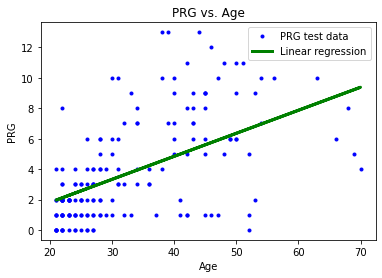

In [30]:
plt.figure()
plt.plot(df_test['Age'],df_test['PRG'],'.b')
plt.plot(df_test['Age'], df_test['PRG prediction'], 
         linewidth=3, color='g')
plt.xlabel('Age')
plt.ylabel('PRG')
plt.title('PRG vs. Age')
plt.legend(['PRG test data', 'Linear regression'], loc='best')

In [31]:
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


**Linear Regression for PL**

In [32]:
X_train = df_train[['PL']]

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
print("The model intercept is: {}".format(model.intercept_))
print("The model coefficients are: {}".format(model.coef_[0]))

The model intercept is: 2.0995400377329543
The model coefficients are: 0.014358021416633695


In [35]:
y_train_pred = model.predict(X_train)

In [36]:
pd.DataFrame({'y_train': y_train, 'y_train_pred': y_train_pred}).head()

,y_train,y_train_pred
0,6,4.224527
1,1,3.319972
2,8,4.727058
3,1,3.377404
4,0,4.066589


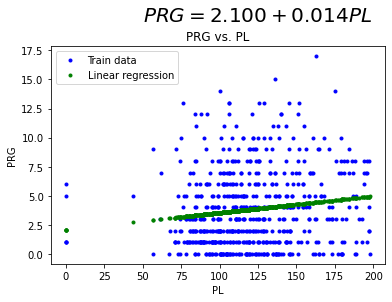

In [37]:
plt.figure()
plt.plot(X_train.PL, y_train, '.b')
plt.plot(X_train.PL, y_train_pred, 
         linewidth=3, color='g', ls='', marker='.')
plt.xlabel('PL')
plt.ylabel('PRG')
plt.title('PRG vs. PL')
plt.legend(['Train data', 'Linear regression'], loc='best')
plt.text(50, 20, '$PRG={:.3f}+{:.3f}PL$'\
         .format(model.intercept_, model.coef_[0]), fontsize=20);

In [38]:
PL_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE = {PL_rmse:.2f}")

RMSE = 3.33


Assess the model

In [39]:
df_test = pd.read_csv('Paitients_Files_Test.csv')
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [40]:
df_test['PRG prediction'] = model.predict(df_test[['PL']])
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,PRG prediction
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,3.664564
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,3.650206
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,3.477910
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,3.879935
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,4.253243


In [41]:
PL_test_rmse = np.sqrt(mean_squared_error(df_test['PRG'], df_test['PRG prediction']))
print("RMSE = {:.2f}".format(PL_test_rmse))

RMSE = 3.38


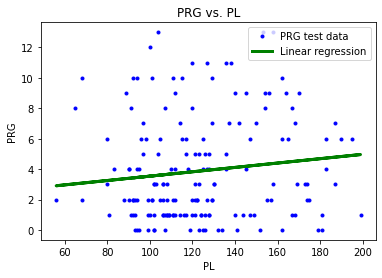

In [42]:
plt.figure()
plt.plot(df_test['PL'],df_test['PRG'],'.b')
plt.plot(df_test['PL'], df_test['PRG prediction'], 
         linewidth=3, color='g')
plt.xlabel('PL')
plt.ylabel('PRG')
plt.title('PRG vs. PL')
plt.legend(['PRG test data', 'Linear regression'], loc='best')

**Linear Regression for TS**

In [43]:
X_train = df_train[['TS']]

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
print("The model intercept is: {}".format(model.intercept_))
print("The model coefficients are: {}".format(model.coef_[0]))

The model intercept is: 3.950346197857056
The model coefficients are: -0.0015811368892236235


In [46]:
y_train_pred = model.predict(X_train)

In [47]:
pd.DataFrame({'y_train': y_train, 'y_train_pred': y_train_pred}).head()

,y_train,y_train_pred
0,6,3.950346
1,1,3.950346
2,8,3.950346
3,1,3.801719
4,0,3.684715


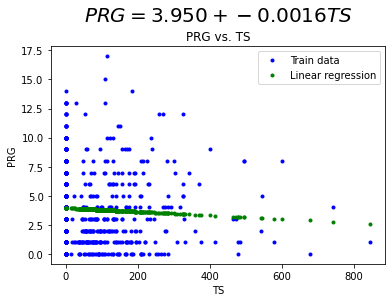

In [48]:
plt.figure()
plt.plot(X_train.TS, y_train, '.b')
plt.plot(X_train.TS, y_train_pred, 
         linewidth=3, color='g', ls='', marker='.')
plt.xlabel('TS')
plt.ylabel('PRG')
plt.title('PRG vs. TS')
plt.legend(['Train data', 'Linear regression'], loc='best')
plt.text(50, 20, '$PRG={:.3f}+{:.4f}TS$'\
         .format(model.intercept_, model.coef_[0]), fontsize=20);

In [49]:
TS_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE = {TS_rmse:.2f}")

RMSE = 3.35


**Assess the model**

In [50]:
df_test = pd.read_csv('Paitients_Files_Test.csv')
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [51]:
df_test['PRG prediction'] = model.predict(df_test[['TS']])
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,PRG prediction
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,3.760610
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,3.950346
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,3.950346
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,3.950346
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,3.751123


In [52]:
TS_test_rmse = np.sqrt(mean_squared_error(df_test['PRG'], df_test['PRG prediction']))
print("RMSE = {:.2f}".format(TS_test_rmse))

RMSE = 3.37


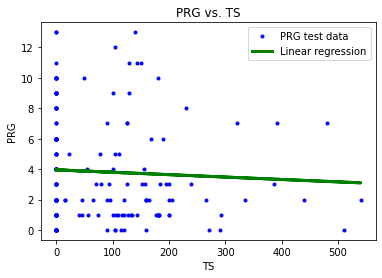

In [68]:
plt.figure()
plt.plot(df_test['TS'],df_test['PRG'],'.b')
plt.plot(df_test['TS'], df_test['PRG prediction'], 
         linewidth=3, color='g')
plt.xlabel('TS')
plt.ylabel('PRG')
plt.title('PRG vs. TS')
plt.legend(['PRG test data', 'Linear regression'], loc='best')

**Multivariate Regression**

In [54]:
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [55]:
X = df_train.drop(['ID','PRG','Sepssis' ], axis = 1)
X.head()

,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,148,72,35,0,33.6,0.627,50,0
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,1
4,137,40,35,168,43.1,2.288,33,1


In [56]:
y = df_train['PRG']
y.head()

0    6
1    1
2    8
3    1
4    0
Name: PRG, dtype: int64

In [57]:
model_multivar = LinearRegression(fit_intercept=False).fit(X, y)

In [58]:
formula = 'PRG = ' + f'{model_multivar.intercept_:.3f}'
for coef, feature in zip(model_multivar.coef_, X.columns[:8]):
    formula += f'{coef:+.3f}*{feature}'
print(formula)

PRG = 0.000-0.002*PL-0.006*PR+0.001*SK-0.001*TS-0.006*M11-0.758*BD2+0.146*Age+0.300*Insurance


In [59]:
df_train['PRG pred multivariate.'] = model_multivar.predict(X)
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,PRG pred multivariate.
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive,6.001535
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative,3.621603
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive,3.635657
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative,2.490019
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive,2.547713


In [60]:
rmse = mean_squared_error(y_true=df_train['PRG'], 
                          y_pred=df_train['PRG pred multivariate.'], 
                          squared=False)
print("RMSE = {:.2f}".format(rmse))

RMSE = 2.83


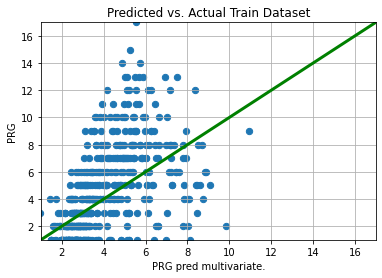

In [61]:
ax = df_train.plot('PRG pred multivariate.','PRG',
                     kind='scatter', s=40,
                     xlim=[1, 17], ylim=[1, 17],
                     title='Predicted vs. Actual Train Dataset',
                   grid = True)
ax.plot(np.linspace(1, 17, 2), np.linspace(1, 17, 2),
        linewidth=3, color='g')

In [62]:
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,PRG prediction
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,3.760610
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,3.950346
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,3.950346
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,3.950346
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,3.751123


In [63]:
X = df_test.drop(['ID','PRG','PRG prediction'], axis = 1)
X.head()

,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,109,38,18,120,23.1,0.407,26,1
1,108,88,19,0,27.1,0.400,24,1
2,96,0,0,0,23.7,0.190,28,1
3,124,74,36,0,27.8,0.100,30,1
4,150,78,29,126,35.2,0.692,54,0


In [64]:
df_test['PRG pred multivariate.'] = model_multivar.predict(X)
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,PRG prediction,PRG pred multivariate.
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,3.760610,3.150688
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,3.950346,2.685207
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,3.950346,3.927761
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,3.950346,3.855688
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,3.751123,6.357743


In [65]:
rmse = mean_squared_error(y_true=df_test['PRG'], 
                          y_pred=df_test['PRG pred multivariate.'], 
                          squared=False)
print("RMSE = {:.2f}".format(rmse))

RMSE = 2.79


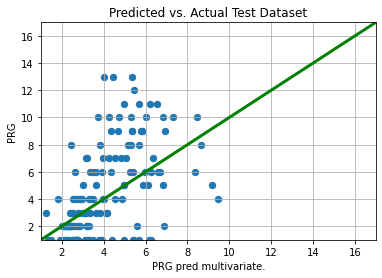

In [66]:
ax = df_test.plot('PRG pred multivariate.','PRG',
                     kind='scatter', s=40,
                     xlim=[1, 17], ylim=[1, 17],
                     title='Predicted vs. Actual Test Dataset',
                  grid = True)
ax.plot(np.linspace(1, 17, 2), np.linspace(1, 17, 2),
        linewidth=3, color='g')

Decision tree

In [75]:
# df_train.drop('PRG pred multivariate.', axis = 1, inplace = True)
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [72]:
from sklearn.tree import DecisionTreeRegressor

In [104]:
X = df_train.drop(['PRG','ID', 'Sepssis'], axis=1)
y = df_train['PRG']

model = DecisionTreeRegressor(min_samples_leaf=10, 
                              ccp_alpha=0.01, 
                              max_leaf_nodes=20,
                              max_depth=3)
model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.01, max_depth=3, max_leaf_nodes=20,
                      min_samples_leaf=10)

In [79]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [92]:
def visualize_tree(model, md=5, fs=(12, 8)):
    plt.figure(figsize=fs)
    plot_tree(model,
            max_depth=md,
            feature_names=model.feature_names_in_,
            label='all',
            filled=True,
            rounded=True, 
            fontsize=12);

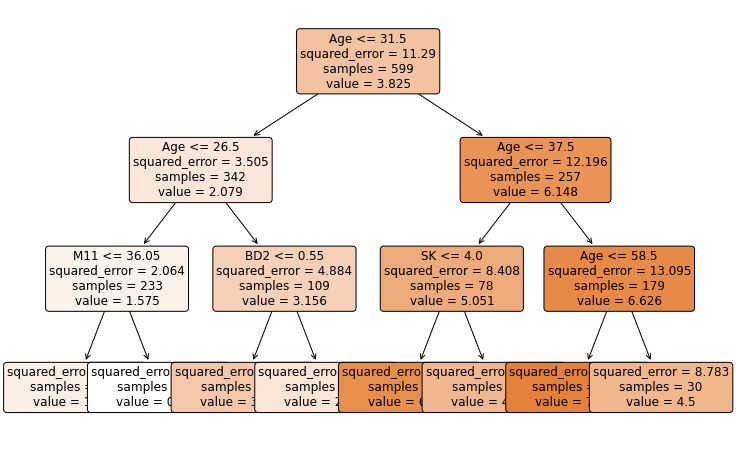

In [93]:
visualize_tree(model, md=3)

In [96]:
from sklearn.tree import plot_tree, export_graphviz
from sklearn.metrics import mean_squared_error as mse
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [97]:
export_graphviz(model)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[6] <= 31.5\\nsquared_error = 11.29\\nsamples = 599\\nvalue = 3.825"] ;\n1 [label="x[6] <= 26.5\\nsquared_error = 3.505\\nsamples = 342\\nvalue = 2.079"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="x[4] <= 36.05\\nsquared_error = 2.064\\nsamples = 233\\nvalue = 1.575"] ;\n1 -> 2 ;\n3 [label="squared_error = 2.098\\nsamples = 179\\nvalue = 1.771"] ;\n2 -> 3 ;\n4 [label="squared_error = 1.402\\nsamples = 54\\nvalue = 0.926"] ;\n2 -> 4 ;\n5 [label="x[5] <= 0.55\\nsquared_error = 4.884\\nsamples = 109\\nvalue = 3.156"] ;\n1 -> 5 ;\n6 [label="squared_error = 4.477\\nsamples = 71\\nvalue = 3.662"] ;\n5 -> 6 ;\n7 [label="squared_error = 4.271\\nsamples = 38\\nvalue = 2.211"] ;\n5 -> 7 ;\n8 [label="x[6] <= 37.5\\nsquared_error = 12.196\\nsamples = 257\\nvalue = 6.148"] ;\n0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n9 [label="x[2] <= 4.0\\nsqu

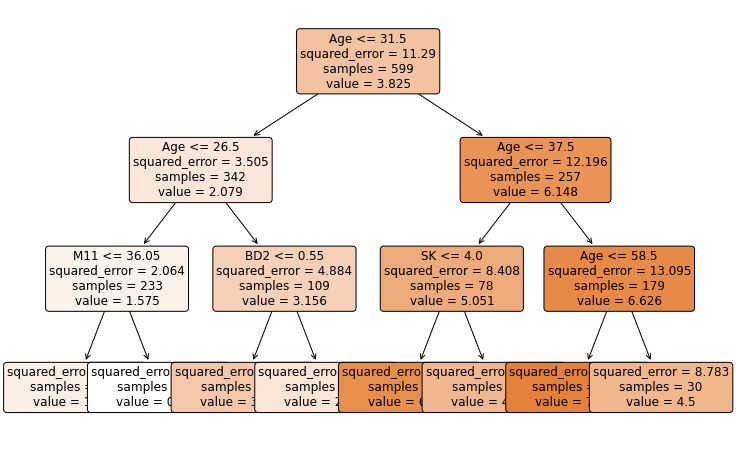

In [98]:
visualize_tree(model, md=7)

In [106]:
y_pred = model.predict(X)

In [107]:
PRG_rmse = mse(y, y_pred, squared=False)
print(f"RMSE = {PRG_rmse:.2f}")
print(y.mean())

RMSE = 2.48
3.8247078464106843


In [108]:
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f'{feature:12}: {importance}')

PL          : 0.0
PR          : 0.0
SK          : 0.023924541631191558
TS          : 0.0
M11         : 0.009656715022695299
BD2         : 0.01699877368392028
Age         : 0.9494199696621928
Insurance   : 0.0


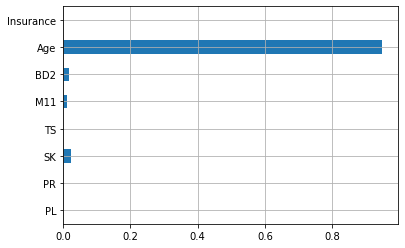

In [118]:
pd.Series(model.feature_importances_, index=X.columns).plot.barh().grid(True)

In [111]:
df_test.drop(['ID','PRG prediction', 'PRG pred multivariate.' ], axis=1, inplace = True)
df_test.head()


,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,1,109,38,18,120,23.1,0.407,26,1
1,1,108,88,19,0,27.1,0.400,24,1
2,6,96,0,0,0,23.7,0.190,28,1
3,1,124,74,36,0,27.8,0.100,30,1
4,7,150,78,29,126,35.2,0.692,54,0


In [115]:
X = df_test.drop(['PRG',], axis=1)
y = df_test['PRG']

In [116]:
y_pred = model.predict(X)

In [117]:
PG_Test_rmse = mse(y, y_pred, squared=False)
print(f"RMSE = {PG_Test_rmse:.2f}")

RMSE = 2.57
